In [1]:
# Linear Regression output: y = wx + b → bất kỳ giá trị nào (-∞ đến +∞)
# Ví dụ: 125.7, -3.4, 0.0001

# Classification cần: 
# - Binary: 0 hoặc 1
# - Probability: giá trị trong [0, 1]

# Vấn đề: Linear Regression không đảm bảo output trong [0, 1]
# → Cần một hàm "ép" output vào [0, 1]

# Hàm sigmoid: 
# f(x) = 1 / (1 + e^(-x))
# Output luôn trong [0, 1]
    

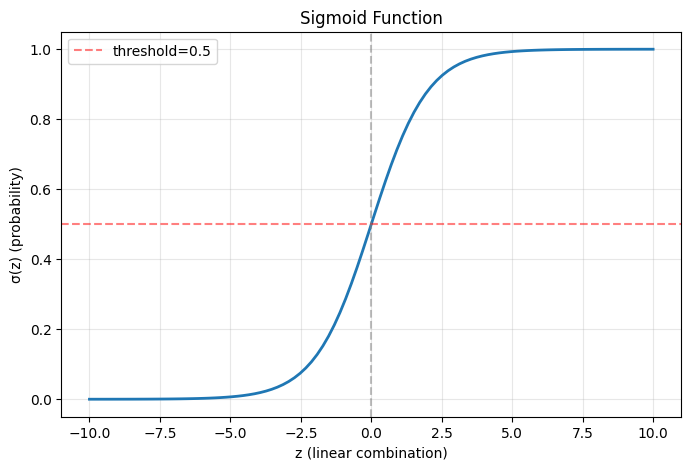

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function: σ(z) = 1 / (1 + e^(-z))
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Vẽ sigmoid
z = np.linspace(-10, 10, 100)
y = sigmoid(z)

plt.figure(figsize=(8, 5))
plt.plot(z, y, linewidth=2)
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.5, label='threshold=0.5')
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('z (linear combination)')
plt.ylabel('σ(z) (probability)')
plt.title('Sigmoid Function')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


In [ ]:
# Logistic Regression:
# 1. Tính z = wx + b (giống linear regression)
# 2. Áp dụng sigmoid: P(y=1|x) = σ(z) = 1 / (1 + e^(-z))
# 3. Predict:
#    - Nếu P(y=1|x) ≥ 0.5 → predict 1
#    - Nếu P(y=1|x) < 0.5 → predict 0

# Output là PROBABILITY (0-1), không phải label trực tiếp



In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load data
data = load_iris()
X, y = data.data, data.target

# Đơn giản hóa: binary classification (chỉ lấy class 0 vs 1)
X_binary = X[y != 2]
y_binary = y[y != 2]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_binary, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

print("Model trained!")
print("Coefficients (w):", model.coef_)
print("Intercept (b):", model.intercept_)


Model trained!
Coefficients (w): [[ 0.89019515 -1.03487978  1.4396469   1.44159094]]
Intercept (b): [0.17368314]


In [5]:
# Hard prediction (labels 0 hoặc 1)
y_pred = model.predict(X_test_scaled)

print("First 10 predictions:", y_pred[:10])
print("First 10 actual:", y_test[:10])

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {acc:.4f} ({acc*100:.2f}%)")


First 10 predictions: [1 1 1 1 0 0 0 1 0 0]
First 10 actual: [1 1 1 1 0 0 0 1 0 0]

Accuracy: 1.0000 (100.00%)


In [6]:
# Soft prediction (probabilities)
y_pred_proba = model.predict_proba(X_test_scaled)

print("First 5 probabilities:")
print(y_pred_proba[:5])
print("\nExplanation:")
print("Each row: [P(class=0), P(class=1)]")
print("→ Nếu P(class=1) > 0.5, predict 1; ngược lại predict 0")


First 5 probabilities:
[[0.13955681 0.86044319]
 [0.00126385 0.99873615]
 [0.00712697 0.99287303]
 [0.00826799 0.99173201]
 [0.98322927 0.01677073]]

Explanation:
Each row: [P(class=0), P(class=1)]
→ Nếu P(class=1) > 0.5, predict 1; ngược lại predict 0


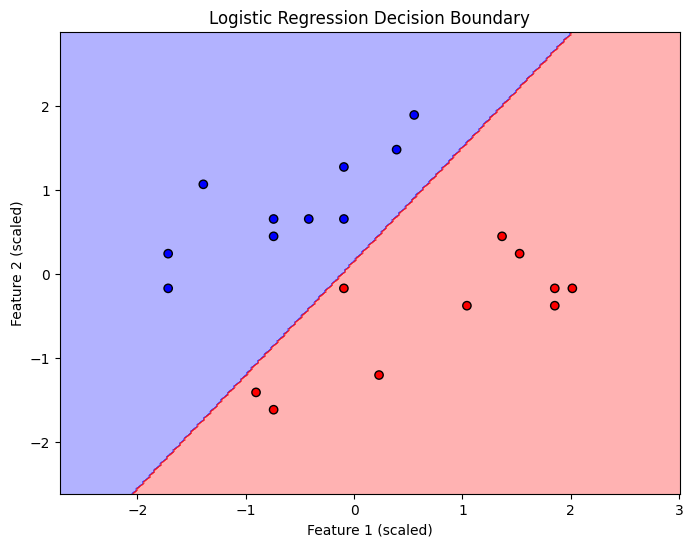

In [7]:
# Chọn 2 features để vẽ (cho dễ nhìn)
X_2d = X_binary[:, [0, 1]]  # sepal length & width
X_train_2d, X_test_2d, y_train, y_test = train_test_split(
    X_2d, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

scaler_2d = StandardScaler()
X_train_2d_scaled = scaler_2d.fit_transform(X_train_2d)
X_test_2d_scaled = scaler_2d.transform(X_test_2d)

model_2d = LogisticRegression(random_state=42)
model_2d.fit(X_train_2d_scaled, y_train)

# Vẽ decision boundary
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X, y):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['blue', 'red']))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=ListedColormap(['blue', 'red']))
    plt.xlabel('Feature 1 (scaled)')
    plt.ylabel('Feature 2 (scaled)')
    plt.title('Logistic Regression Decision Boundary')

plt.figure(figsize=(8, 6))
plot_decision_boundary(model_2d, X_test_2d_scaled, y_test)
plt.show()


In [8]:
# Logistic Regression cũng làm được multi-class (>2 classes)
# Sklearn dùng "one-vs-rest" hoặc "multinomial"

# Load toàn bộ Iris (3 classes)
X_full, y_full = data.data, data.target

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42, stratify=y_full
)

scaler_full = StandardScaler()
X_train_full_scaled = scaler_full.fit_transform(X_train_full)
X_test_full_scaled = scaler_full.transform(X_test_full)

# Train multi-class
model_multi = LogisticRegression(multi_class='multinomial', max_iter=200, random_state=42)
model_multi.fit(X_train_full_scaled, y_train_full)

y_pred_multi = model_multi.predict(X_test_full_scaled)
acc_multi = accuracy_score(y_test_full, y_pred_multi)

print(f"Multi-class Accuracy: {acc_multi:.4f}")

# Probabilities cho 3 classes
y_pred_proba_multi = model_multi.predict_proba(X_test_full_scaled)
print("\nFirst 3 samples probabilities:")
print(y_pred_proba_multi[:3])
print("Classes:", data.target_names)


Multi-class Accuracy: 0.9333

First 3 samples probabilities:
[[9.78818005e-01 2.11816311e-02 3.63821812e-07]
 [3.79836951e-03 3.69220168e-01 6.26981463e-01]
 [1.48799040e-01 8.42474895e-01 8.72606441e-03]]
Classes: ['setosa' 'versicolor' 'virginica']


c:\Users\an.ly\OneDrive - Orient\2026\ai-engineer\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [2]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

# 1. Load dataset
data = load_breast_cancer()
X = data.data          # features
y = data.target        # labels (0 = malignant, 1 = benign)

print("Shape X:", X.shape)
print("Shape y:", y.shape)
print("Classes:", data.target_names)


Shape X: (569, 30)
Shape y: (569,)
Classes: ['malignant' 'benign']


In [3]:
# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y,      # giữ tỷ lệ class
)

# 3. Chuẩn hóa feature (rất quan trọng cho logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
# 4. Khởi tạo model
log_reg = LogisticRegression(
    penalty="l2",
    C=1.0,
    solver="lbfgs",
    max_iter=1000,
    n_jobs=-1
)

# 5. Train
log_reg.fit(X_train_scaled, y_train)

# 6. Dự đoán
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]


In [6]:
# 7. Metrics cơ bản
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")

# 8. Classification report chi tiết
print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# 9. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)


Accuracy : 0.9825
Precision: 0.9861
Recall   : 0.9861
F1-score : 0.9861

Classification report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion matrix:
 [[41  1]
 [ 1 71]]


#EXAM

In [10]:
# 4. Khởi tạo model
log_reg = LogisticRegression(
    penalty="l2",
    C=0.01,#[0.01, 0.1, 1, 10],
    solver="liblinear",
    max_iter=1000,
    n_jobs=-1
)

# 5. Train
log_reg.fit(X_train_scaled, y_train)

# 6. Dự đoán
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]


c:\Users\an.ly\OneDrive - Orient\2026\ai-engineer\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1305: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


In [11]:
# 7. Metrics cơ bản
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")

# 8. Classification report chi tiết
print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# 9. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)


Accuracy : 0.9561
Precision: 0.9589
Recall   : 0.9722
F1-score : 0.9655

Classification report:
              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        42
      benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion matrix:
 [[39  3]
 [ 2 70]]
